In [1]:
import pandas as pd
import numpy as np
import missingno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# Loading and data treatment

In [2]:
# Loading dataset
df_house = pd.read_excel("house.xlsx")
df_house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000


In [3]:
# Dataset information
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  BsmtFinSF1     1460 non-null   int64  
 12  BsmtFinSF2     1460 non-null   int64  
 13  BsmtUnfSF      1460 non-null   int64  
 14  TotalBsmtSF    1460 non-null   int64  
 15  1stFlrSF       1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  LowQualFinSF   1460 non-null   int64  
 18  GrLivAre

In [4]:
# Dataset statistics
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Treating missing data

In [5]:
# NaN data analysis
df_house.isna().sum()[df_house.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

<AxesSubplot:>

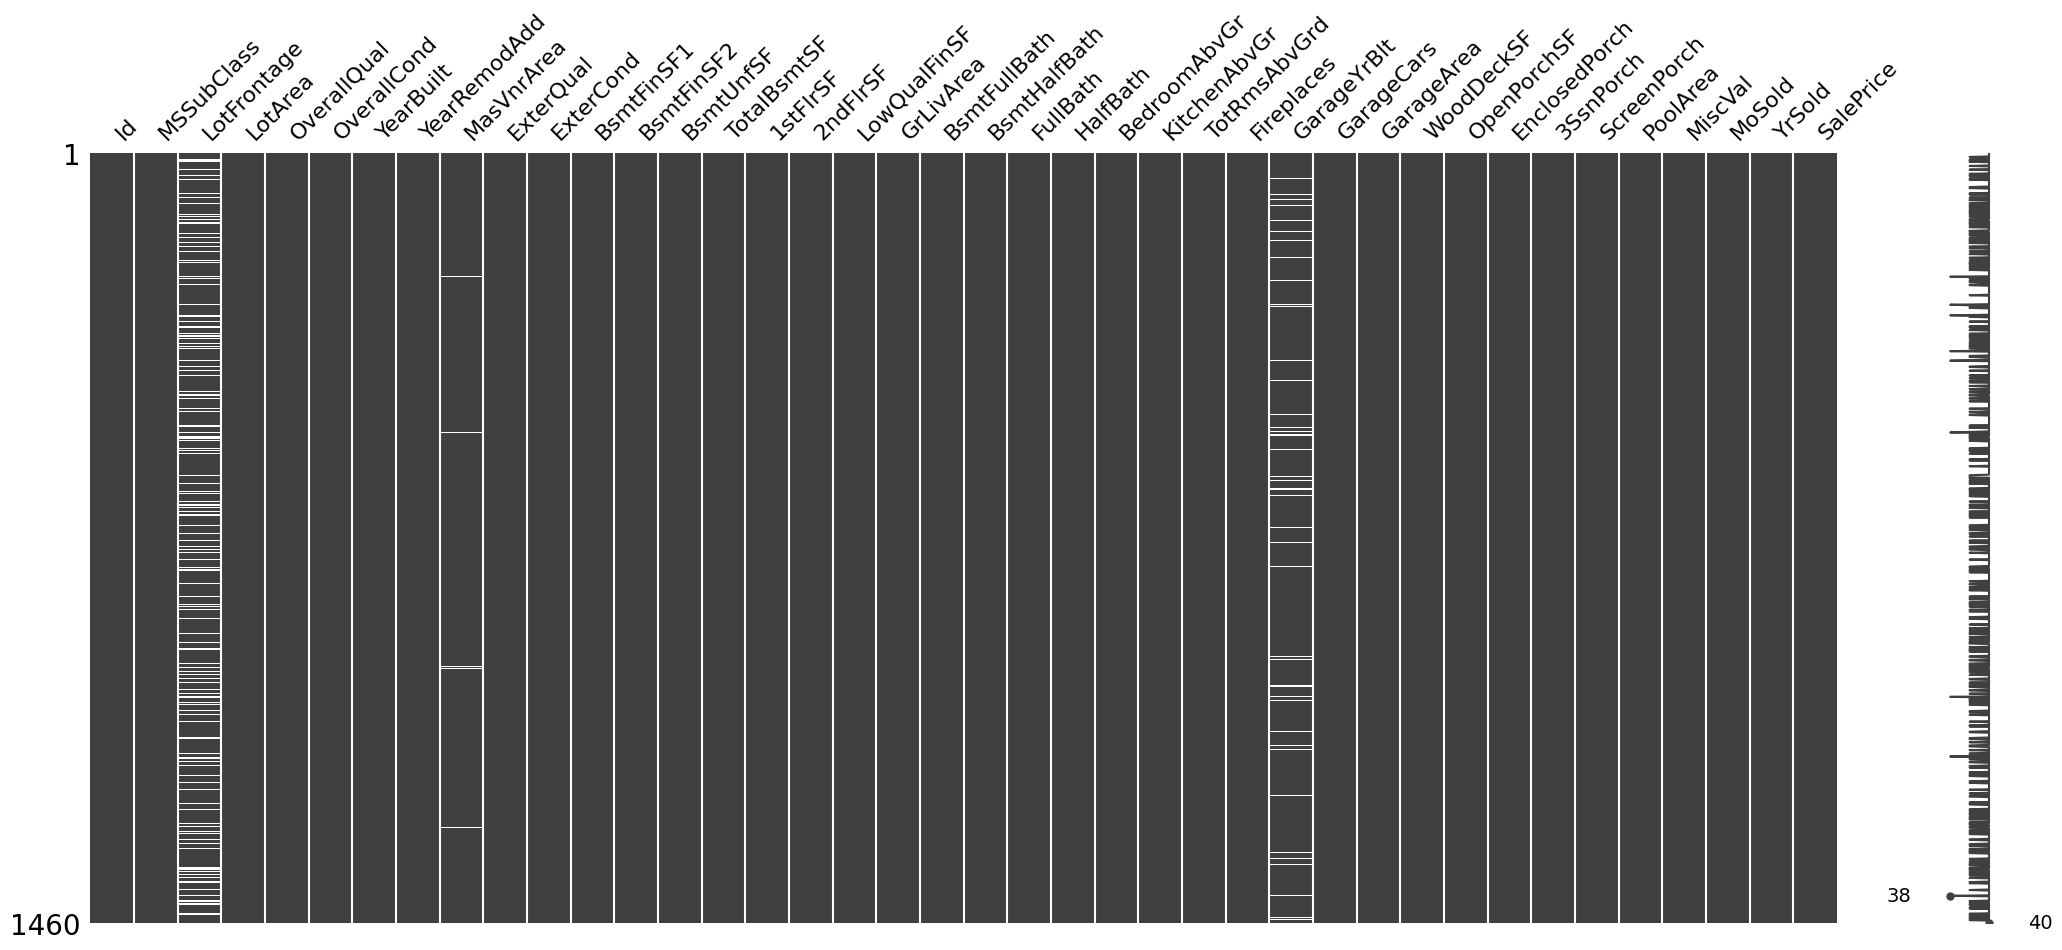

In [6]:
# Visualizing NaN data
missingno.matrix(df_house)

In [7]:
# Adotando a estratégia de substituir dados faltantes em LotFrontAge pela mediana
df_house["LotFrontage"] = df_house["LotFrontage"].fillna(df_house["LotFrontage"].median())

# Adotando a estratégia de substituir dados faltantes em MasVnrArea por 0
df_house["MasVnrArea"] = df_house["MasVnrArea"].fillna(0)

# Adotando a estratégia de substituir dados faltantes em GarageYrBlt por 0
df_house["GarageYrBlt"] = df_house["GarageYrBlt"].fillna(0)

## Treating categorical data

In [8]:
# Verificando as variáveis do tipo object
cat_cols = df_house.select_dtypes(exclude="number").columns
display(df_house[cat_cols].head())
print(df_house["ExterQual"].unique())
print(df_house["ExterCond"].unique())

,ExterQual,ExterCond
0,Gd,TA
1,TA,TA
2,Gd,TA
3,TA,TA
4,Gd,TA


['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']


In [9]:
# Substituindo as fetures ExterQual e ExterCond por valores numéricos
label_order = {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0}
df_house[cat_cols] = df_house[cat_cols].replace(label_order)
display(df_house[cat_cols].head())
df_house.dtypes

,ExterQual,ExterCond
0,3,2
1,2,2
2,3,2
3,2,2
4,3,2


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64


# Modelagem e avaliação do modelo

In [10]:
# Data separation between regressors and target
X = df_house.drop(labels=["Id", "SalePrice"], axis=1)
y = df_house["SalePrice"]

# Data separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

## Default GradientBoosting

In [28]:
# Fitting the model
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)

# Model prediction
y_pred = gb.predict(X_test)

# Model evaluation
print(f"R² = {metrics.r2_score(y_pred, y_test)}")
print(f"MAE = {metrics.mean_absolute_error(y_pred, y_test)}")

R² = 0.8683251485676777
MAE = 15992.513972919123


## Tuning GradientBoosting with Grid Search

In [32]:
# Parameters for tuning
parameters = dict(
    n_estimators = [100],
    learning_rate = [.1, .2],
    max_depth = [3, 5],
    min_samples_split = [2, 3],
    min_samples_leaf = [1, 3],
    subsample = [.5, 1],
    max_features = [10 , 20, 40]
)

# Declaring and fitting with grid_search
grid_search = GridSearchCV(gb, parameters, scoring="r2", cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'max_features': [10, 20, 40],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 3], 'n_estimators': [100],
                         'subsample': [0.5, 1]},
             scoring='r2')

In [34]:
# Best estimator
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=5, max_features=10, min_samples_split=3,
                          random_state=0, subsample=1)

## Training tunned GradientBoosting

In [35]:
# Fitting the model
gb_tunned = GradientBoostingRegressor(max_depth=5, max_features=10, min_samples_split=3,
                                      random_state=0, subsample=1)
gb_tunned.fit(X_train, y_train)

# Model predict
y_pred_tunned = gb_tunned.predict(X_test)
print(f"R² = {metrics.r2_score(y_pred_tunned, y_test)}")
print(f"MAE = {metrics.mean_absolute_error(y_pred_tunned, y_test)}")

R² = 0.8788432121578411
MAE = 16129.446797804907
